### Autism is a neurological disorder that affects a person’s ability to interact with others, make eye contact with others, learn capacity, and other behavioral and social capabilities of a person. According to the Centers for Disease Control, autism affects an estimated 1 in 36 children in the United States today.

# But there is no ascertain way to tell whether a person has Autism or not because there are no such diagnostics methods available to diagnose this disorder. But what if we use machine learning to predict whether a person suffers from Autism or not?

---



# The Information about the Dataset.


# Attributes:


**ID** - ID of the patient

**A1_Score to A10_Score** - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool.

AQ- The Autism-Spectrum Quotient Test (abbreviated to AQ) is a diagnostic questionnaire designed to measure the expression of Autism-Spectrum traits in an individual, by his or her own subjective self-assessment.

**age**- Age of the patient in years

**gender** - Gender of the patient

**ethnicity** - Ethnicity of the patient

**jaundice** - Whether the patient had jaundice at the time of birth

**autism** - Whether an immediate family member has been diagnosed with autism

**contry_of_res** - Country of residence of the patient

**used_app_before** - Whether the patient has undergone a screening test before

**result** - Score for AQ1-10 screening test

**age_desc** - Age of the patient

**relation** - Relation of patient who completed the test

**Class/ASD** - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [ ]:
# Importing Necessary Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset.

Data=pd.read_csv('/content/train (1).csv')

In [ ]:
Data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
Data.shape

(800, 22)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
Data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
#Checking for null values.

Data.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
# Replacing the null values.
Data.replace('?', np.nan, inplace=True)

In [ ]:
Data.isnull().sum()

ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          203
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation            40
Class/ASD            0
dtype: int64

**Data Cleaning**

In [ ]:
# Getting unique values of object data type attributes.

Data['gender'].value_counts()

m    530
f    270
Name: gender, dtype: int64

In [ ]:
Data['ethnicity'].value_counts()

White-European     257
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In [ ]:
Data['relation'].value_counts()

Self                        709
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64

In the above two outputs we can observe some ambiguity that there are ‘others’, and ‘Others’ which all must be the same as they are unknown or we can say that null values have been substituted with some indicator.

In [ ]:
Data=Data.replace({'others': 'Others', 'yes':1, 'no':0})

**Performing EDA**

In [ ]:
class_asd=Data['Class/ASD'].value_counts()

In [ ]:
class_asd

0    639
1    161
Name: Class/ASD, dtype: int64

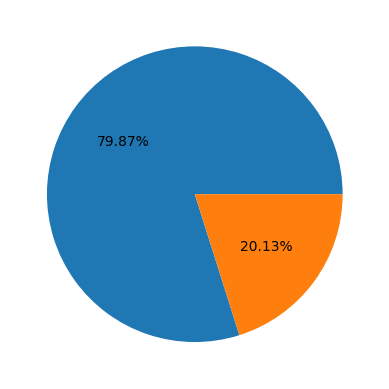

In [ ]:
plt.pie(class_asd, autopct='%1.2f%%')
plt.show()

In [ ]:
# data_1={'False':639, 'True':161}

# key=list(data_1.keys())
# values=list(data_1.values())

# color=sns.color_palette('bright')

# plt.pie(values, labels=key, colors=color)
# plt.show()


# Another way to implement the above Pie Chart analysis.

 From the above plot we can observe that the dataset we have is highly imbalanced. If we will train our model using this data then the model will face a hard time predicting the positive class which is our main objective here to predict whether a person has autism or not with high accuracy.

In [ ]:
Data['gender'].value_counts()

m    530
f    270
Name: gender, dtype: int64

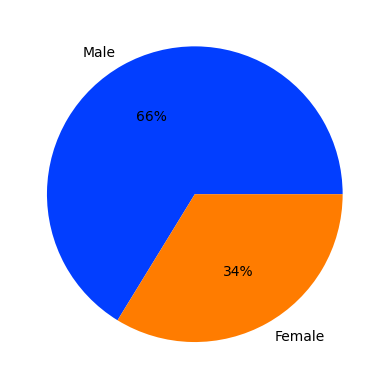

In [ ]:

data = {'Male': 530, 'Female': 270}
key = list(data.keys())
values = list(data.values())

palette_color = sns.color_palette('bright')

plt.pie(values, labels=key, colors=palette_color, autopct='%.0f%%')

plt.show()


In [ ]:
ints=[]
floats=[]
objects=[]

for col in Data.columns:
  if Data[col].dtype==int:
    ints.append(col)

  elif Data[col].dtype==object:
    objects.append(col)

  else:
    floats.append(col)

Now, we have columns segregated based on the type of data they contain hence now we’ll be able to perform suitable analysis depending upon the type of data.

In [ ]:
# display of each of the above created lists:

print(ints)
print(objects)
print(floats)

['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim', 'used_app_before', 'Class/ASD']
['gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation']
['age', 'result']


The ‘ID’ column will contain a unique value for each of the rows and for the column ‘Class/ASD’ we have already analyzed its distribution so, that is why they have been removed in the above code.

In [ ]:
ints.remove('ID')
ints.remove('Class/ASD')

In [ ]:
a_score=ints[:10]

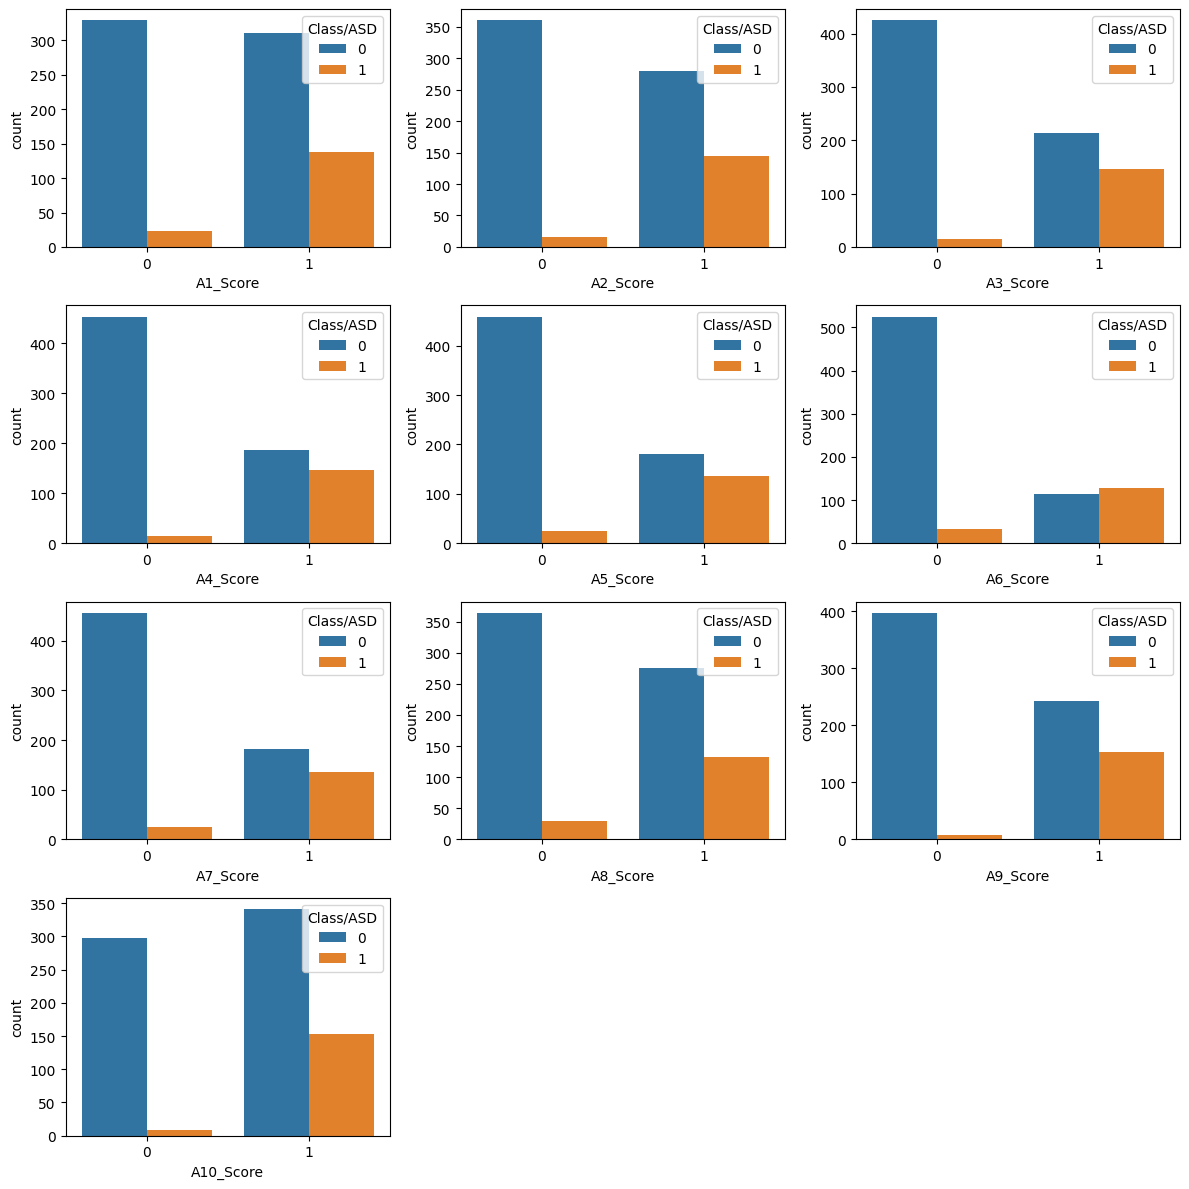

In [ ]:
plt.subplots(figsize=(12,12))

for i, col in enumerate(a_score):
  plt.subplot(4,3,i+1)
  sns.countplot(x=Data[col], hue=Data['Class/ASD'])
plt.tight_layout()
plt.show()


From these plots, we can conclude that if the score of some indicator is 0 then the chances of that person not having autism is quite high except in the case of A10_Score.

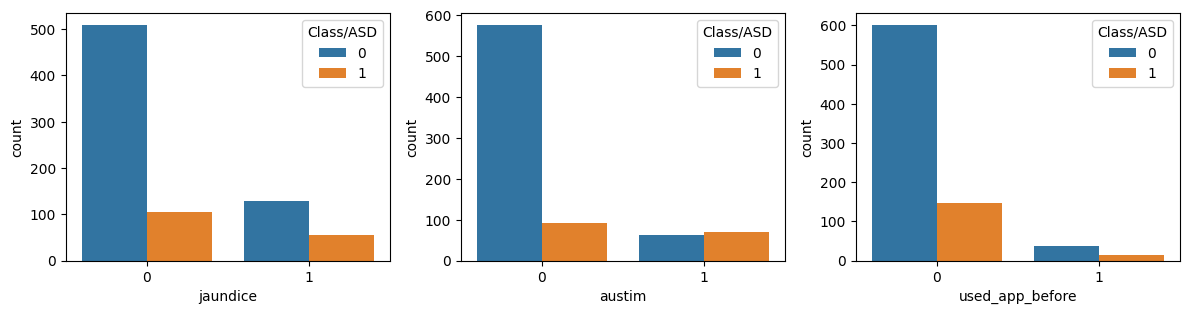

In [ ]:
plt.subplots(figsize=(12,12))

for i, col in enumerate(ints[10:]):
  plt.subplot(4,3,i+1)
  sns.countplot(x=Data[col], hue=Data['Class/ASD'])
plt.tight_layout()
plt.show()

From the above analysis , we can conclude that if the person did not have jaundice previously, then chances of person not having Autism is high as compared to the person who had jaundice.


Also, if the some one in the home did not had autism the chances are more that the person is not having Autism.


From the third plot it is evident that if the person did not go for the screening test earlier then there are high chance that the person is suffering from Autism.

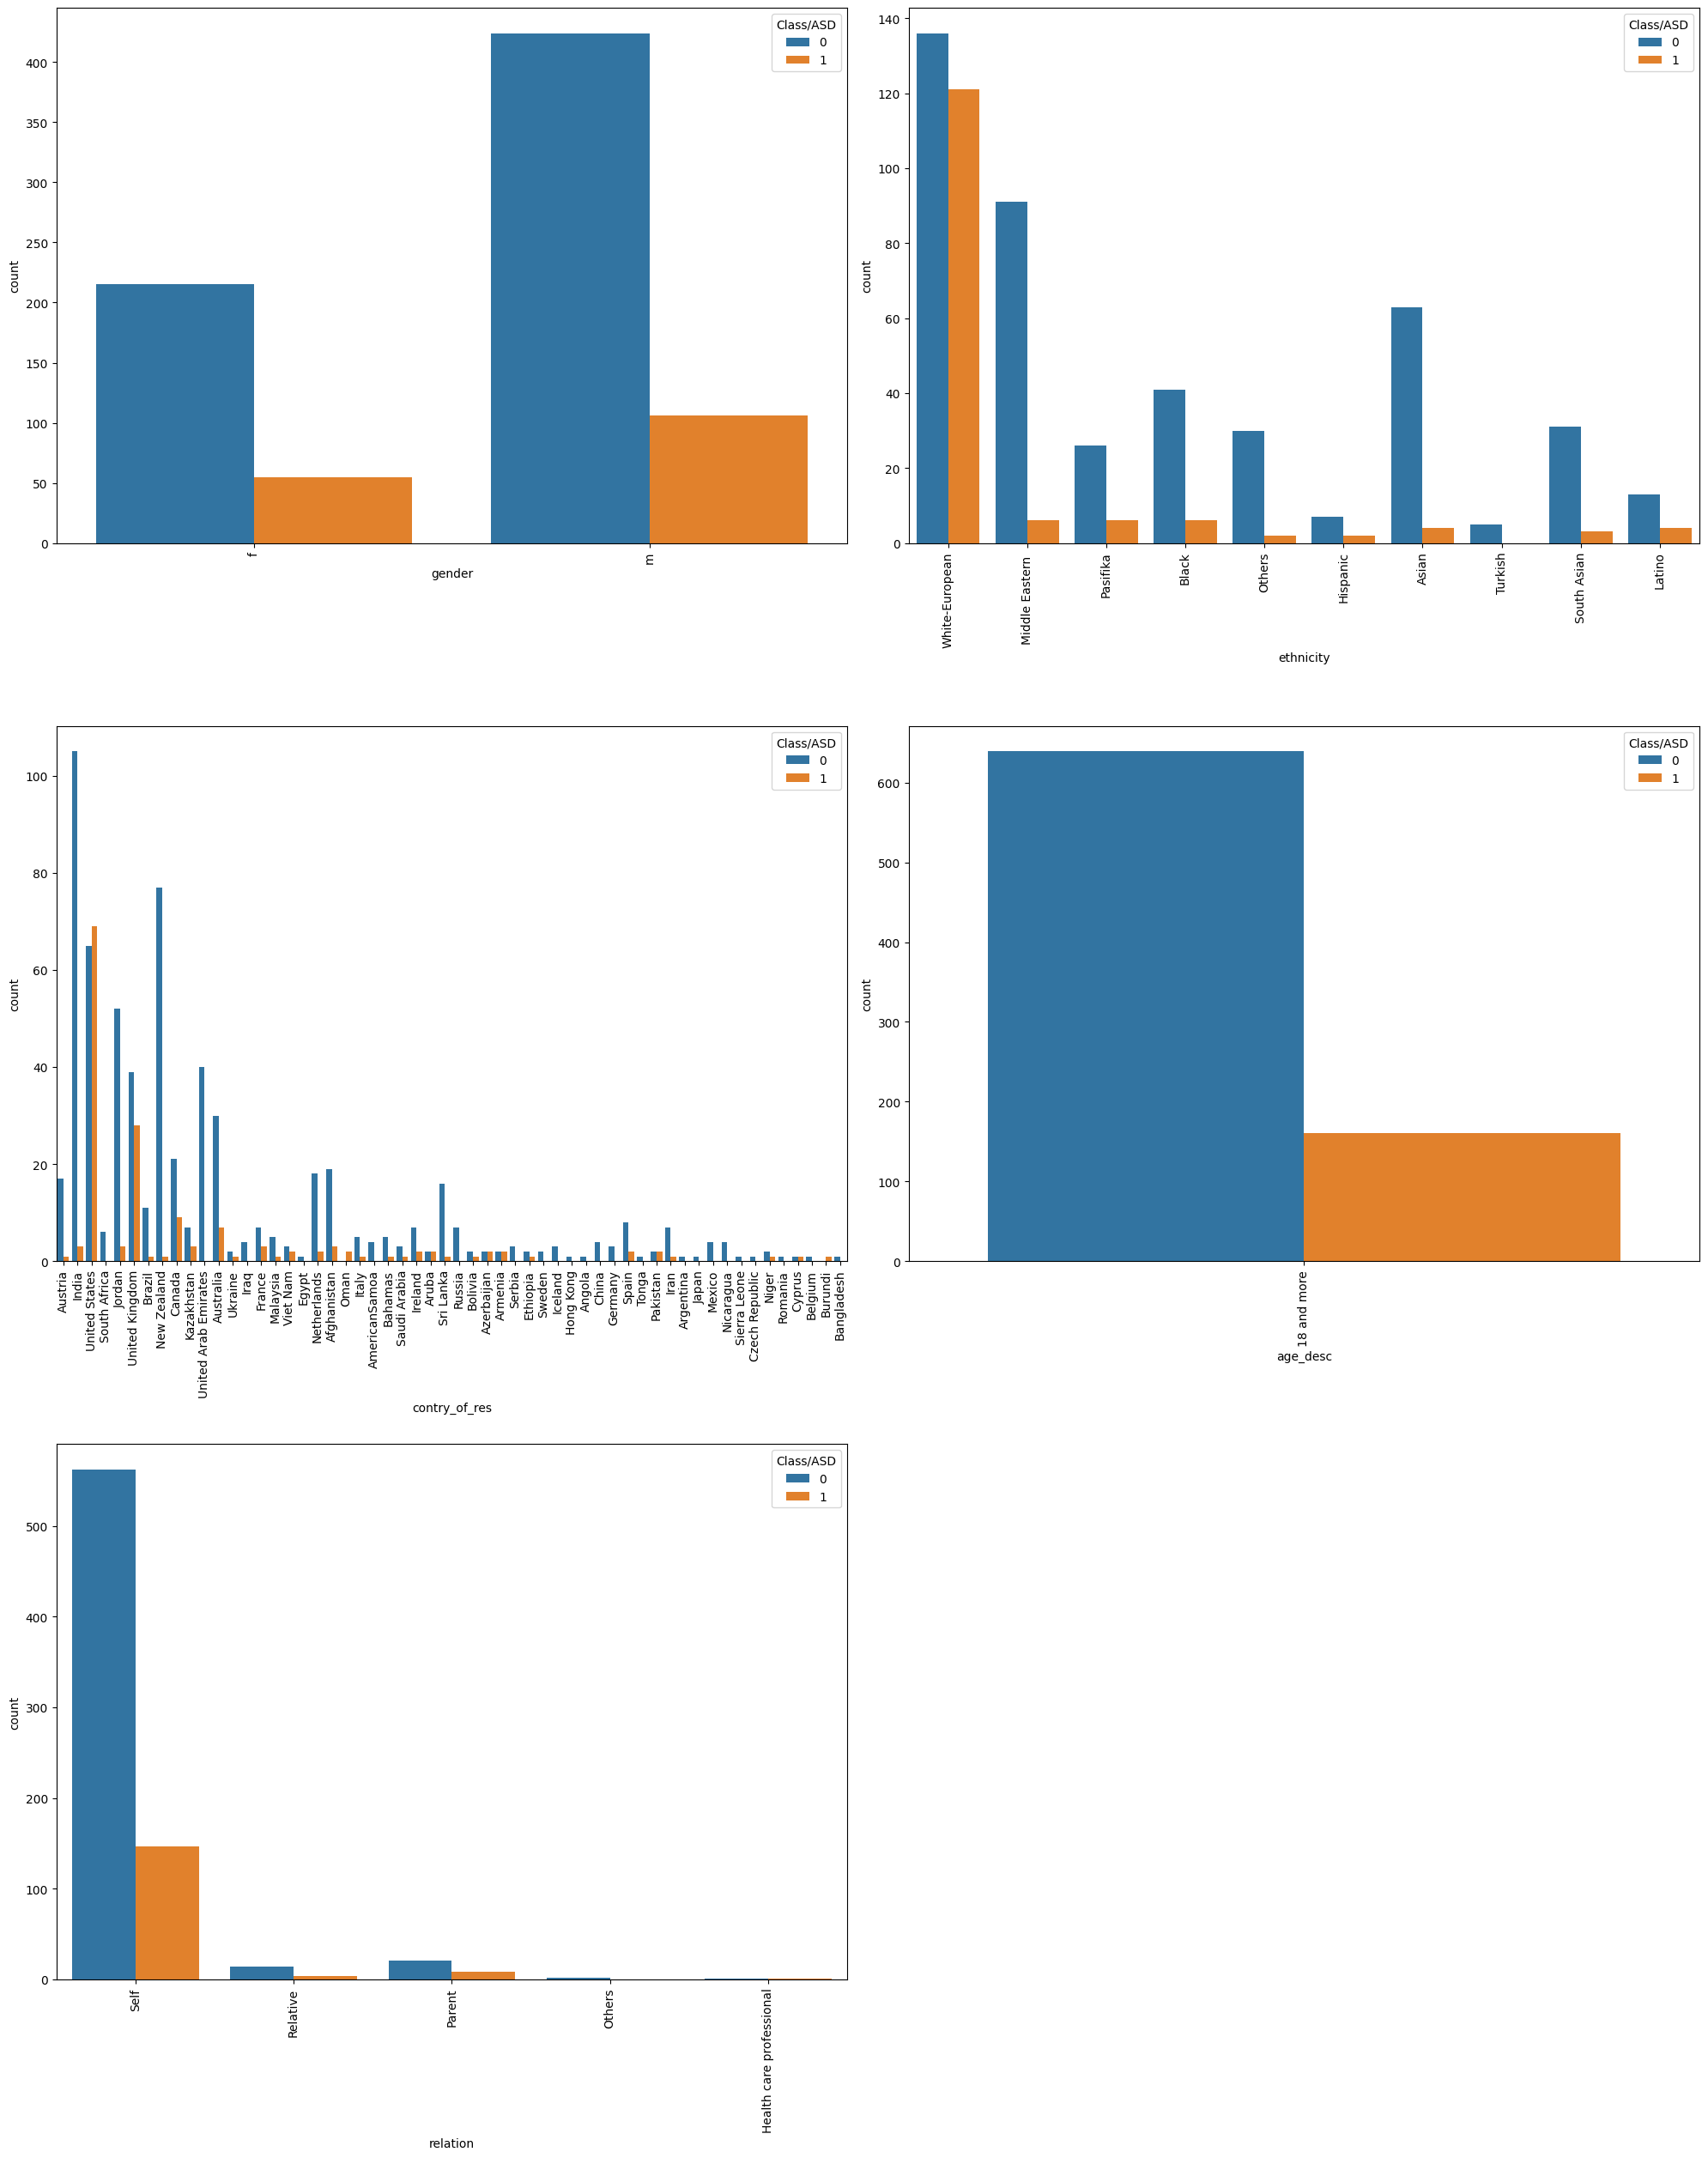

In [ ]:
plt.subplots(figsize=(20,40))

for i , col in enumerate(objects):
  plt.subplot(5,2,i+1)
  sns.countplot(x=Data[col], hue=Data['Class/ASD'])
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. From the above analysis, we can observe that the chances of Male suffering from Autism is sightly more in comaprison to female.

2. The white-european is the ethnicity which has high chances suffering from Autism and also the same ethnicity has greater count of people not suffering from Autism.

3. In some places approximately 50% of the data available for that country have autism and in some places, this is quite low. This implies that the geography of a person also gives an idea of having autism.

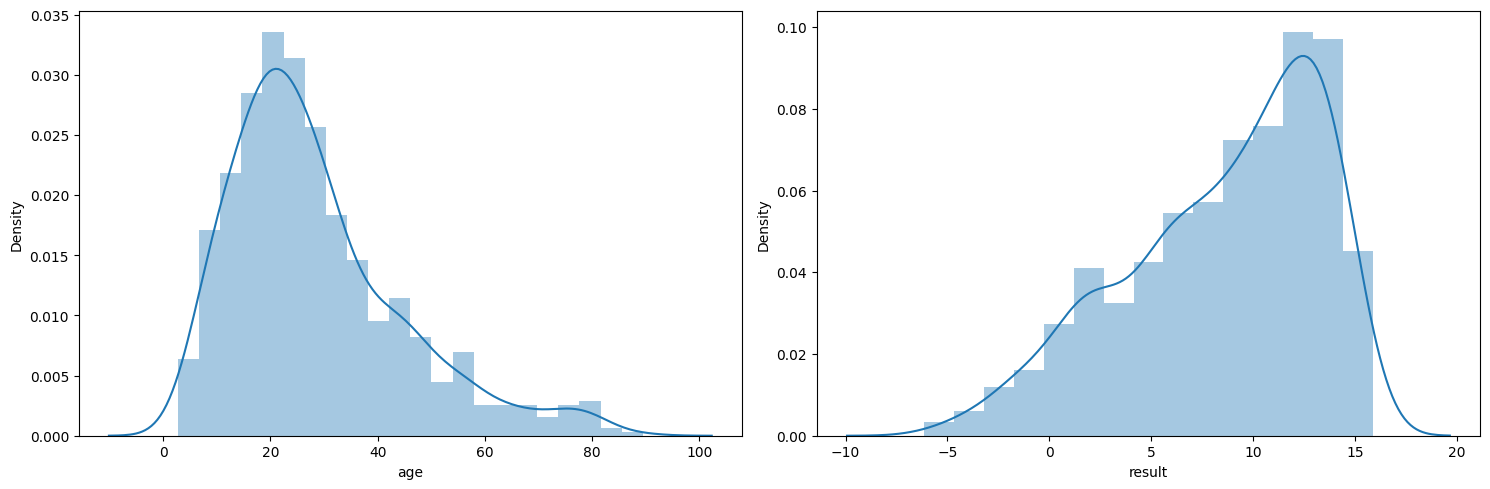

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.distplot(Data[col])
plt.tight_layout()
plt.show()

Both of the continuous data are skewed left one is positive and the right one is negatively skewed.

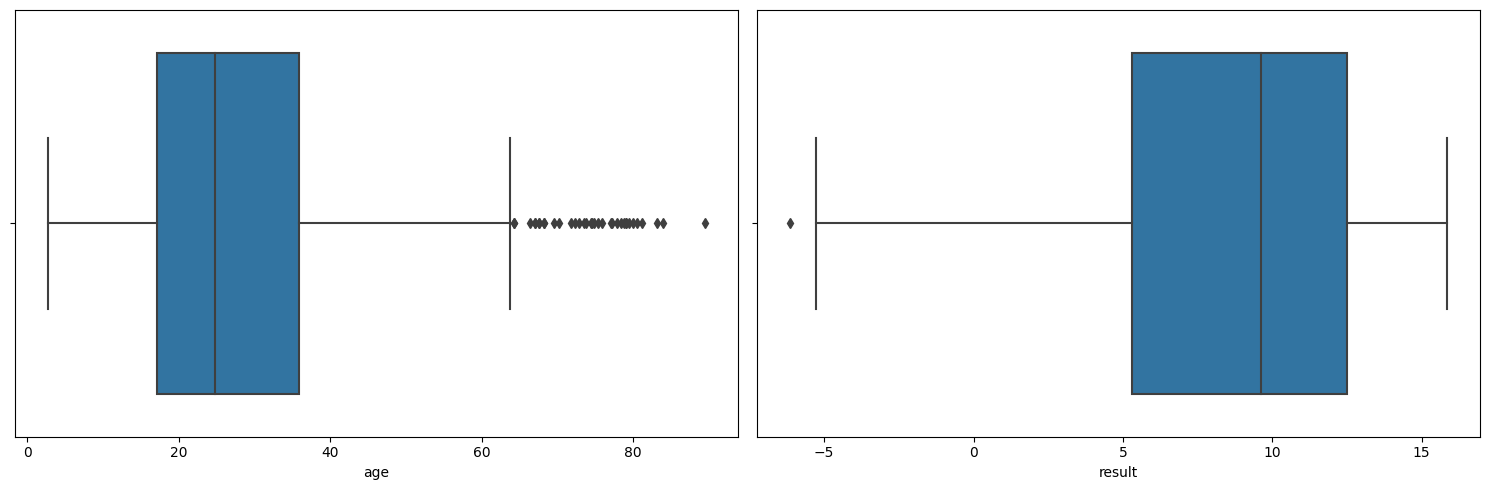

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.boxplot(x=Data[col])
plt.tight_layout()
plt.show()

In [ ]:
# Removing the Outliers
Data=Data[Data['result']>-5]
Data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,NaN,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,NaN,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,NaN,0,0,United States,0,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,NaN,0,0,South Africa,0,-4.777286,18 and more,Self,0


In [ ]:
Data.shape

(798, 22)

In [ ]:
#imputing the missing values of Ethnicity andd Relation using most frequesnt values

simple_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

Data["ethnicity"] = simple_imputer.fit_transform(Data[["ethnicity"]]).reshape(-1)
Data["relation"] = simple_imputer.fit_transform(Data[["relation"]]).reshape(-1)

In [ ]:
Data.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

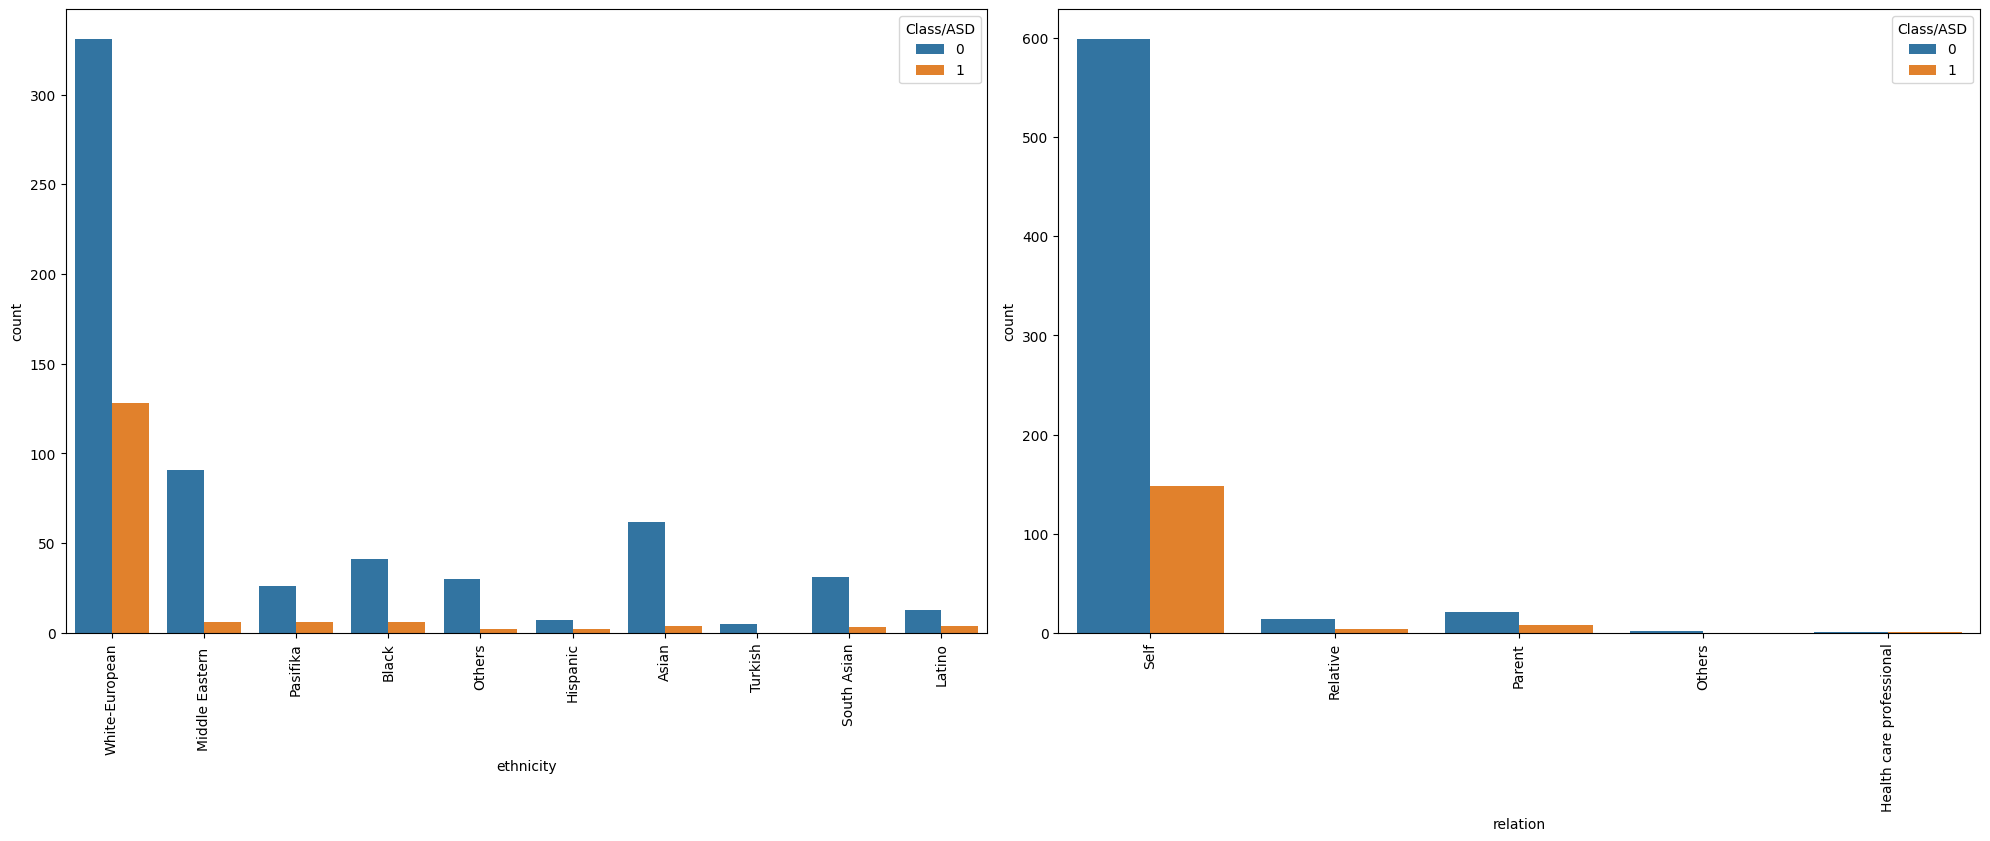

In [ ]:
plt.subplots(figsize=(20, 40))

lis = ["ethnicity", "relation"]
for i, col in enumerate(lis):
	plt.subplot(5, 2, i+1)
	sns.countplot(x=Data[col], hue=Data['Class/ASD'])
	plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Feature Engineering**

In [ ]:
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

Data['ageGroup'] = Data['age'].apply(convertAge)

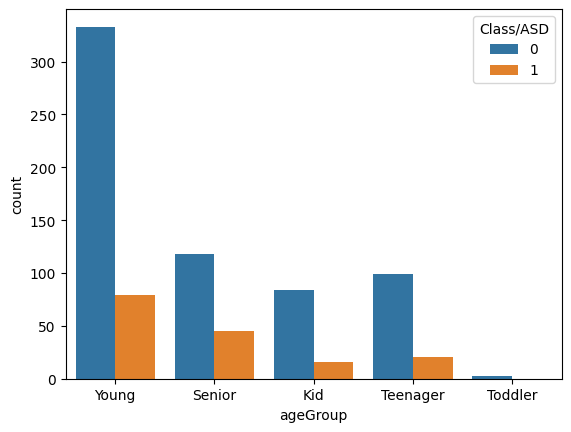

In [ ]:
sns.countplot(x=Data["ageGroup"], hue=Data["Class/ASD"])
plt.show()

Here we can conclude that the Young and Toddler group of people have lower chances of having Autism.

In [ ]:
def add_feature(Data):

  # Creating a column with all values zero
  Data['sum_score'] = 0
  for col in Data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    Data['sum_score'] += Data[col]

  # Creating a random data using the below three columns
  Data['ind'] = Data['austim'] + Data['used_app_before'] + Data['jaundice']

  return Data

df = add_feature(Data)

In [ ]:
Data['sum_score']

0       6
1       0
2      10
3       0
4       0
       ..
795     3
796     6
797     0
798     0
799     1
Name: sum_score, Length: 798, dtype: int64

In [ ]:
Data['ind']

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    1
798    0
799    1
Name: ind, Length: 798, dtype: int64

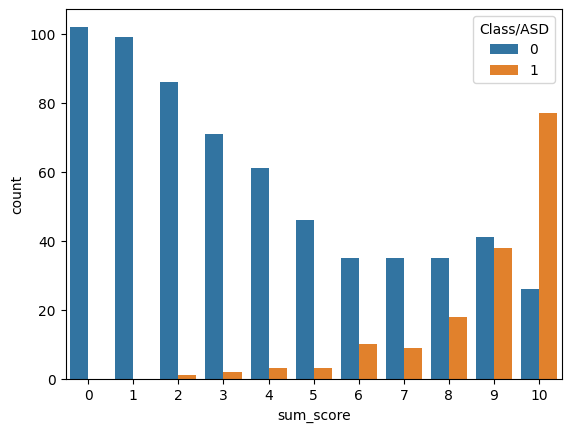

In [ ]:
sns.countplot(x=Data["sum_score"], hue=Data["Class/ASD"])
plt.show()

Another amazing observation higher the sum score higher the chances of having autism is higher as well and similarly for lower sum scores that are for less than 5 it is rare that the person has autism.


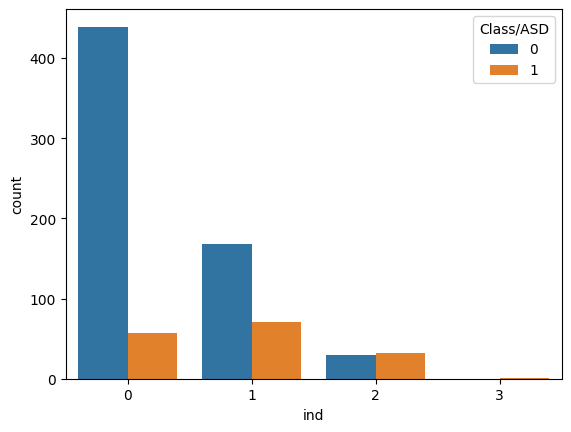

In [ ]:
sns.countplot(x=Data["ind"], hue=Data["Class/ASD"])
plt.show()

In [ ]:
# Applying log transformations to remove the skewness of data.
Data['age']=Data['age'].apply(lambda x: np.log(x))

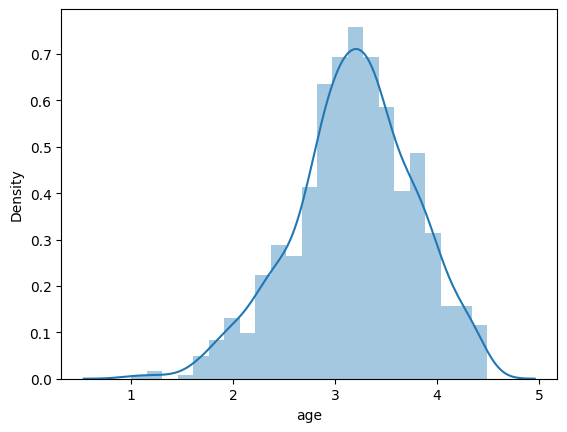

In [ ]:
sns.distplot(Data['age'])
plt.show()

In [ ]:
# Data['result']=Data['result'].apply(lambda x: np.log(x))

In [ ]:
# sns.distplot(Data['result'])
# plt.show()

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 799
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               798 non-null    int64  
 1   A1_Score         798 non-null    int64  
 2   A2_Score         798 non-null    int64  
 3   A3_Score         798 non-null    int64  
 4   A4_Score         798 non-null    int64  
 5   A5_Score         798 non-null    int64  
 6   A6_Score         798 non-null    int64  
 7   A7_Score         798 non-null    int64  
 8   A8_Score         798 non-null    int64  
 9   A9_Score         798 non-null    int64  
 10  A10_Score        798 non-null    int64  
 11  age              798 non-null    float64
 12  gender           798 non-null    object 
 13  ethnicity        798 non-null    object 
 14  jaundice         798 non-null    int64  
 15  austim           798 non-null    int64  
 16  contry_of_res    798 non-null    object 
 17  used_app_before 

In [ ]:
Data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,ageGroup,sum_score,ind
0,1,1,0,1,0,1,0,1,0,1,...,0,Austria,0,6.351166,18 and more,Self,0,Young,6,0
1,2,0,0,0,0,0,0,0,0,0,...,0,India,0,2.255185,18 and more,Self,0,Senior,0,0
2,3,1,1,1,1,1,1,1,1,1,...,1,United States,0,14.851484,18 and more,Self,1,Kid,10,1
3,4,0,0,0,0,0,0,0,0,0,...,0,United States,0,2.276617,18 and more,Self,0,Young,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,South Africa,0,-4.777286,18 and more,Self,0,Senior,0,0


In [ ]:
# Encoding Categorical Variables

def encode_labels(d):
  for col in d.columns:
    if d[col].dtype == 'object':
      le = LabelEncoder()
      d[col] = le.fit_transform(d[col])
  return d

Data = encode_labels(Data)


In [ ]:
Data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,ageGroup,sum_score,ind
0,1,1,0,1,0,1,0,1,0,1,...,0,7,0,6.351166,0,4,0,4,6,0
1,2,0,0,0,0,0,0,0,0,0,...,0,25,0,2.255185,0,4,0,1,0,0
2,3,1,1,1,1,1,1,1,1,1,...,1,54,0,14.851484,0,4,1,0,10,1
3,4,0,0,0,0,0,0,0,0,0,...,0,54,0,2.276617,0,4,0,4,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,46,0,-4.777286,0,4,0,1,0,0


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 799
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               798 non-null    int64  
 1   A1_Score         798 non-null    int64  
 2   A2_Score         798 non-null    int64  
 3   A3_Score         798 non-null    int64  
 4   A4_Score         798 non-null    int64  
 5   A5_Score         798 non-null    int64  
 6   A6_Score         798 non-null    int64  
 7   A7_Score         798 non-null    int64  
 8   A8_Score         798 non-null    int64  
 9   A9_Score         798 non-null    int64  
 10  A10_Score        798 non-null    int64  
 11  age              798 non-null    float64
 12  gender           798 non-null    int64  
 13  ethnicity        798 non-null    int64  
 14  jaundice         798 non-null    int64  
 15  austim           798 non-null    int64  
 16  contry_of_res    798 non-null    int64  
 17  used_app_before 

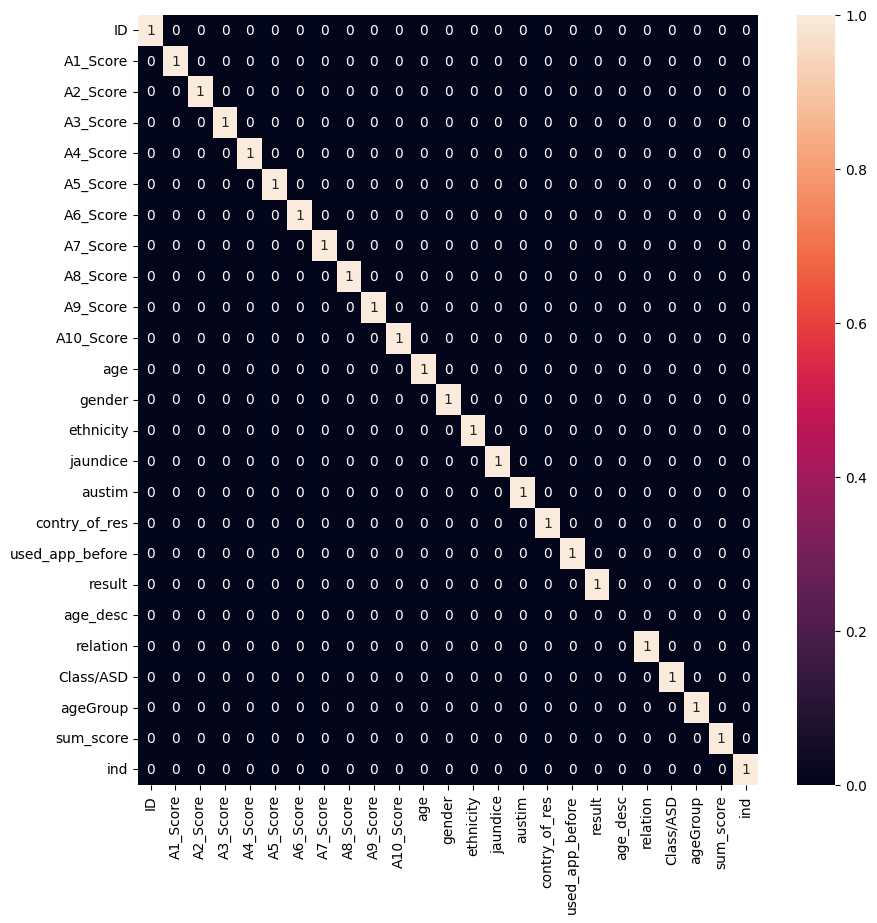

In [ ]:
# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr() > 0.8, annot=True)
plt.show()

**Splitting the Dataset**

In [ ]:
y=Data['Class/ASD']
x=Data.drop(["age_desc", "ID", "used_app_before", "Class/ASD"], axis=1)


In [ ]:
x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,result,relation,ageGroup,sum_score,ind
0,1,0,1,0,1,0,1,0,1,1,...,0,9,0,0,7,6.351166,4,4,6,0
1,0,0,0,0,0,0,0,0,0,0,...,1,9,0,0,25,2.255185,4,1,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,9,0,1,54,14.851484,4,0,10,1
3,0,0,0,0,0,0,0,0,0,0,...,0,9,0,0,54,2.276617,4,4,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,9,0,0,46,-4.777286,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,...,1,2,0,0,36,12.999501,4,2,3,0
796,0,1,1,0,0,1,0,1,1,1,...,1,9,0,0,17,13.561518,4,4,6,0
797,0,0,0,0,0,0,0,0,0,0,...,1,7,1,0,36,2.653177,4,0,0,1
798,0,0,0,0,0,0,0,0,0,0,...,0,9,0,0,15,9.069342,4,2,0,0


In [ ]:
y

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 798, dtype: int64

In [ ]:
x.shape,y.shape

((798, 21), (798,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
x, y = ros.fit_resample(X_train,y_train)
x.shape, y.shape

((1028, 21), (1028,))

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
x = scaler.fit_transform(x)
X_test = scaler.transform(X_test)

In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(x, y)

  print(f'{model} : ')
  print('Training set Accuracy : ', metrics.roc_auc_score(y, model.predict(x)))
  print('Testing set Accuracy : ', metrics.roc_auc_score(y_test, model.predict(X_test)))
  print()

LogisticRegression() : 
Training set Accuracy :  0.8472762645914397
Testing set Accuracy :  0.8010327400571302

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training set Accuracy :  1.0
Testing set Accuracy :  0.7822456602944408

SVC() : 
Training set Accuracy :  0.9377431906614786
Testing

In [ ]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       123
           1       0.56      0.81      0.66        37

    accuracy                           0.81       160
   macro avg       0.74      0.81      0.76       160
weighted avg       0.85      0.81      0.82       160



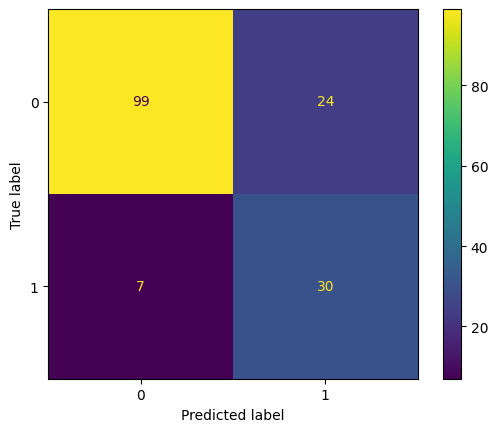

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test), values_format='.5g')
cm_display